import packages

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

open the dataset and take a peak at the values

In [68]:
shopify_data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
shopify_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


inspect the data

In [69]:
shopify_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the information above, we can see that the AOV (Average Order Value) was actually calculated correctly to be $3145 since this is the mean. But the minimum value $90 is quite far from the mean and the maximum value $704,000 is an outrageous outlier. Again, comparing this mean($3145) and the median ($248), we can see the large disparity suggesting that the data is skewed. We need to visualize this data to further aid our inspection.

Text(0.5, 1.05, 'Scatter plot of Order amount for each Order id')

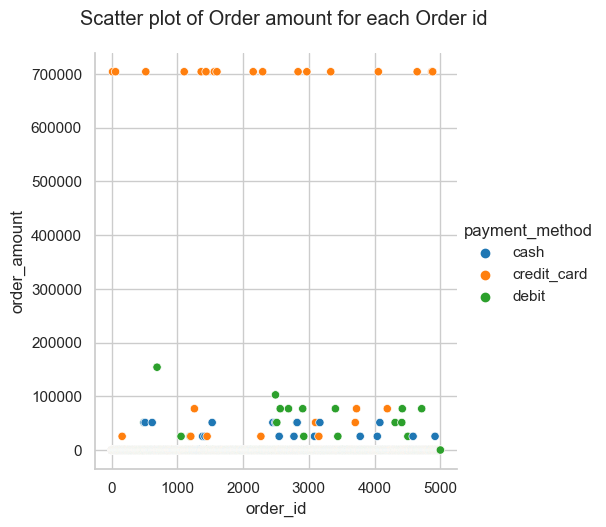

In [70]:
''' plot a scatter plot ''' 

# set the display style 
sns.set_style('whitegrid')
sns.set_context('notebook')

# plot the scatter plot
g = sns.relplot(x = 'order_id', y = 'order_amount', data = shopify_data, kind = 'scatter', hue = 'payment_method')

# set the title
g.fig.suptitle("Scatter plot of Order amount for each Order id", y = 1.05)

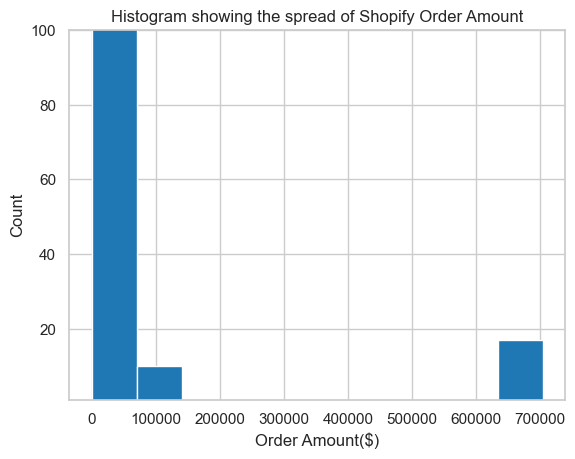

In [71]:
''' plot a histogram '''
shopify_hist = shopify_data['order_amount'].hist()

# range of the y-axis
shopify_hist.set_ylim([1,100])

# title , x-axis and y-axis labels
shopify_hist.set_title('Histogram showing the spread of Shopify Order Amount')
shopify_hist.set_xlabel('Order Amount($)')
shopify_hist.set_ylabel('Count')
plt.show()

From the scatterplot above we can see that the maximum value of $700000 is an extreme outlier, wierdly all were credit card transactions.

We can also see from the histogram that the data is extremely skewed to the right. This is also due to the outrageous $700000 outlier.

From these information above:

- Sneakers are a relatively affordable item, so the AOV (Average Order Amount) shouldn't be so high.

- Using the AOV (Average Order Amount) of $3145.13 as our metric is wrong. This is due to the influence of the extreme outliers. 

- A better way to calculate the AOV (Average Order Amount) is to calculate the mean within a confidence interval, preferrably within a `5% to 95%` interval. This should help eliminate any extreme outlier.

- However, the outliers are part of the data and cannot be ignored. Bur they should be investigated for accuracy.

- For now, the most convenient metric to use as the AOV (Average Order Amount) is the `median` of the data.

- Its value is `$284.0`